# 文献计量学作业

## 数据下载
从 Web of Science 上检索“气候变化”与“洪水”相关的论文，并将检索结果下载保存：

- 主题词 (Topic) 关键词为: AND `"climat* chang*"` AND `flood* OR "hydrologic* disaster*"`
- 搜索时间 (Year Published) 为 `2019-2023`
- 搜索索引 (Web of Science Index) 为： `SSCI`、`SCIE` 和 `A&HCI`

搜索的 URL 为：https://webofscience.clarivate.cn/wos/woscc/summary/d2cfc2ac-cafb-4ced-a430-dc5db5f3d76e-e1862557/relevance/1

搜索结果共计 <b>11388</b> 条

> 由于 WOS 上 Year Published 字段是会同时包含 the publication 和 the early access date 字段的，所以在统计 PY 的时候，会出现依然有 2024 年的文献的情况

## 数据读取

利用 Python Pandas 包读取下载的 `txt` 文件并进行合并为一个 `DataFrame`。删除不需要的 `AB` 和 `CR` 字段，以获得和教程相同的数据

In [2]:
import pandas as pd
import glob


# 获取所有csv文件的路径
csv_files = glob.glob('data/第*.txt')

# 创建一个列表来存储所有的DataFrame
dfs = []

# 循环读取其余的csv文件并将其追加到df中
for file in csv_files:
    # 制表符分隔符
    temp_df = pd.read_table(file, sep='\t', quoting=3)
    # 打印每个csv文件的行数
    # print('Number of rows in {}: {}'.format(file, temp_df.shape[0]))
    dfs.append(temp_df)

# 使用pd.concat合并所有的DataFrame
df = pd.concat(dfs, ignore_index=True)

# 如果 'AB' 和 'CR' 列存在，删除它们
for col in ['AB', 'CR']:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

# 删除 'PY' 为 2024 的行
df = df[df['PY'] != 2024]

# 打印行数
print('Total number of rows: {}'.format(df.shape[0]))

# 预览若干行
df.head(3)

# # 保存为 tab 分隔的 txt 文件
# df.to_csv('data/ori-data.txt', sep='\t', index=False)


Total number of rows: 11141


,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,WC,WE,SC,GA,PM,OA,HC,HP,DA,UT
0,J,"Tavares, PD; Acosta, R; Nobre, P; Resende, NC;...",NaN,NaN,NaN,"da Silva Tavares, Priscila; Acosta, Ricardo; N...",NaN,NaN,Water balance components and climate extremes ...,REGIONAL ENVIRONMENTAL CHANGE,...,Environmental Sciences; Environmental Studies,Science Citation Index Expanded (SCI-EXPANDED)...,Environmental Sciences & Ecology,9B6ZG,36820201.0,"Green Published, Bronze",NaN,NaN,2024-04-22,WOS:000934883400001
1,J,"Zhou, YH; Wu, ZN; Xu, HS; Wang, HL; Ma, BY; Lv, H",NaN,NaN,NaN,"Zhou, Yihong; Wu, Zening; Xu, Hongshi; Wang, H...",NaN,NaN,Integrated dynamic framework for predicting ur...,JOURNAL OF HYDROLOGY,...,"Engineering, Civil; Geosciences, Multidiscipli...",Science Citation Index Expanded (SCI-EXPANDED),Engineering; Geology; Water Resources,C9CO3,NaN,NaN,NaN,NaN,2024-04-22,WOS:000964816400001
2,J,"Latifi, M; Rakhshandehroo, G; Nikoo, MR; Moose...",NaN,NaN,NaN,"Latifi, Morvarid; Rakhshandehroo, Gholamreza; ...",NaN,NaN,Multi-stakeholder stochastic optimization of u...,JOURNAL OF CLEANER PRODUCTION,...,Green & Sustainable Science & Technology; Engi...,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics; Engineeri...,8B9GI,NaN,NaN,NaN,NaN,2024-04-22,WOS:000917227500001


## 数据处理

### 数据预处理

为 `DataFrame` 添加编号列，并利用正则表达式去掉 `,` 和 `;` 后不需要的空白字符

In [3]:

# 添加一列 No. 列作为索引
if 'No.' not in df.columns:
    df.insert(0, 'No.', range(1, 1 + len(df)))

# 利用正则表达式反向预查去掉所有单元格中 "," 和 ";" 后的空白字符
df.replace(r'(?<=,|;)\s+', '', regex=True, inplace=True)

# 保存为 tab 分隔的 txt 文件，这个文件作为原始数据
df.to_csv('data/ori-data.txt', sep='\t', index=False)

df.head(5)


,No.,PT,AU,BA,BE,GP,AF,BF,CA,TI,...,WC,WE,SC,GA,PM,OA,HC,HP,DA,UT
0,1,J,"Tavares,PD;Acosta,R;Nobre,P;Resende,NC;Chou,SC...",NaN,NaN,NaN,"da Silva Tavares,Priscila;Acosta,Ricardo;Nobre...",NaN,NaN,Water balance components and climate extremes ...,...,Environmental Sciences;Environmental Studies,Science Citation Index Expanded (SCI-EXPANDED)...,Environmental Sciences & Ecology,9B6ZG,36820201.0,"Green Published,Bronze",NaN,NaN,2024-04-22,WOS:000934883400001
1,2,J,"Zhou,YH;Wu,ZN;Xu,HS;Wang,HL;Ma,BY;Lv,H",NaN,NaN,NaN,"Zhou,Yihong;Wu,Zening;Xu,Hongshi;Wang,Huiliang...",NaN,NaN,Integrated dynamic framework for predicting ur...,...,"Engineering,Civil;Geosciences,Multidisciplinar...",Science Citation Index Expanded (SCI-EXPANDED),Engineering;Geology;Water Resources,C9CO3,NaN,NaN,NaN,NaN,2024-04-22,WOS:000964816400001
2,3,J,"Latifi,M;Rakhshandehroo,G;Nikoo,MR;Mooselu,MG",NaN,NaN,NaN,"Latifi,Morvarid;Rakhshandehroo,Gholamreza;Niko...",NaN,NaN,Multi-stakeholder stochastic optimization of u...,...,Green & Sustainable Science & Technology;Engin...,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics;Engineerin...,8B9GI,NaN,NaN,NaN,NaN,2024-04-22,WOS:000917227500001
3,4,J,"Liu,ZZ;Fagherazzi,S;Liu,XH;Shao,DD;Miao,CY;Cai...",NaN,NaN,NaN,"Liu,Zezheng;Fagherazzi,Sergio;Liu,Xinhui;Shao,...",NaN,NaN,Long-term variations in water discharge and se...,...,Environmental Sciences;Marine & Freshwater Bio...,Science Citation Index Expanded (SCI-EXPANDED),Environmental Sciences & Ecology;Marine & Fres...,6V5IM,NaN,gold,NaN,NaN,2024-04-22,WOS:000895081300001
4,5,J,"Bouaakkaz,B;El Morjani,ZE;Bouchaou,L",NaN,NaN,NaN,"Bouaakkaz,Brahim;El Morjani,Zine El Abidine;Bo...",NaN,NaN,Social vulnerability assessment to flood hazar...,...,"Geosciences,Multidisciplinary",Science Citation Index Expanded (SCI-EXPANDED),Geology,6S8LQ,NaN,NaN,NaN,NaN,2024-04-22,WOS:000893234900001


### 文献作者统计

创建一个 `DataFrame`，用于统计每篇论文的作者数。
将 AU 列按 `;` 分割为一个数组，然后统计作者数量作为 `NO.AU` 列插入到该 `DataFrame` 中

In [4]:
# 创建一个新的 DataFrame
no_au_df = pd.DataFrame()

# 将 AU 列中的字符串，将其用 ';' 分割为一个列表，作为 AU 列
# 先判断 AU 列是否为字符串，如果是字符串，再进行分割

no_au_df['NO.'] = df['No.']
no_au_df['AU'] = df['AU'].str.split(';')
no_au_df['AF'] = df['AF'].str.split(';')

# 对 AF 的列表进行去重
# 真是服气了，怎么还有同一个作者出现两次的情况（
no_au_df['AF'] = no_au_df['AF'].apply(lambda x: list(set(x)) if isinstance(x, list) else x)


# 计算 AU 列中的作者数量，将其作为 'NO.AU' 列，插入到 AU 列前面

idx = no_au_df.columns.get_loc('AU')
no_au_df.insert(idx, 'NO.AU', no_au_df['AU'].apply(len))

# 保存为 tab 分隔的 txt 文件
no_au_df.to_csv('data/no-au-data.txt', sep='\t', index=False)

# 按照 'NO.AU' 列降序排列
temp_df = no_au_df.sort_values('NO.AU', ascending=False, inplace=False)
temp_df.head(10)



,NO.,NO.AU,AU,AF
1128,1098,208,"[Correa,DF, Stevenson,PR, Umaña,MN, Coelho,LD,...","[Ferreira,Cid, Pennington,Toby, Zagt,Roderick,..."
1457,1420,131,"[Sousa,TR, Schietti,J, Ribeiro,IO, Emílio,T, F...","[Bonal,Damien, Salomao,Rafael, Zagt,Roderick, ..."
7901,7725,92,"[Kreibich,H, Van Loon,AF, Schröter,K, Ward,PJ,...","[Mazzoleni,Maurizio, Tran,Thi Van Thu, Biancam..."
1351,1316,91,"[Kretibich,H, Schröter,K, Di Baldassarre,G, Va...","[Mazzoleni,Maurizio, Tran,Thi Van Thu, Biancam..."
3487,3403,76,"[Zhang,SH, Zhang,C, Cai,WJ, Bai,YQ, Callaghan,...","[Zhou,Hao, Huang,Xiaomeng, Jiang,Qiaolei, Ji,J..."
3833,3745,70,"[Harvey,JA, Tougeron,K, Gols,R, Heinen,R, Abar...","[Verberk,Wilco C. E. P., Garcia-Robledo,Carlos..."
8437,8246,52,"[Smith,MN, Stark,SC, Taylor,TC, Schietti,J, de...","[Souza,Mendell S., Aragao,Luiz E. O. C., Smith..."
6703,6552,49,"[Beringer,J, Moore,CE, Cleverly,J, Campbell,DI...","[Hinko-Najera,Nina, Prober,Suzanne M., Meyer,W..."
7736,7562,49,"[van Hateren,TC, Jongen,HJ, Al-Zawaidah,H, Bee...","[Gallitelli,Luca, Jongen,Harro J., Blanco Rami..."
4736,4630,47,"[Bloeschl,G, Hall,J, Viglione,A, Perdigao,RAP,...","[Frolova,Natalia, Bilibashi,Ardian, Osuch,Marz..."


### 文献类型统计

新建一个 `DataFrame`，对 `DT` 列进行计数，计算占比

In [5]:
# 对 DT 列出现的文献类型进行计数
dt_df = df['DT'].value_counts().reset_index(name='COUNT')


# 插入一列百分比并保留两位小数
dt_df['PER'] = dt_df['COUNT'] / dt_df['COUNT'].sum()*100


dt_df.head(10)



,DT,COUNT,PER
0,Article,9951,89.318733
1,Review,824,7.396104
2,Article;Early Access,120,1.077103
3,Editorial Material,102,0.915537
4,Article;Proceedings Paper,49,0.439817
5,Review;Early Access,17,0.152590
6,Book Review,17,0.152590
7,Letter,14,0.125662
8,Article;Data Paper,12,0.107710
9,Review;Book Chapter,10,0.089759


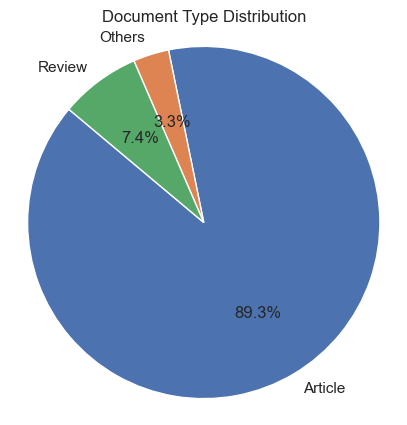

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# 绘制文献类型的饼图, 合并占比小于 1% 的文献类型
temp = dt_df.copy()
temp.loc[temp['PER'].astype(float) < 3, 'DT'] = 'Others'
temp = temp.groupby('DT').agg({'COUNT': 'sum', 'PER': 'sum'}).reset_index()

plt.figure(figsize=(5, 5))
plt.pie(temp['COUNT'], labels=temp['DT'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Document Type Distribution')
plt.show()

### 成长趋势统计表

新建一个 `DataFrame`，按 `PY` 列进行统计

- 对 `PY` 计数
- 统计 `NO.AU` 之和，以及关于`PY` 计数的平均值
- 统计 `NR` 之和，以及关于`PY` 计数的平均值
- 统计 `PG` 之和，以及关于`PY` 计数的平均值
- 统计 `TC` 之和，以及关于`PY` 计数的平均值

值得注意的是，尽管我们的筛选的时候限定了 Year Published 字段，但是该字段实际上包含了 publication year 和  early access date 两个时间。因此部分 early access 不在 2024 年，但 publish 在 2024 年的文献也会被选中下载下来。

In [7]:
# 新建一个 DataFrame
trend_df = pd.DataFrame()

# 对 PY 列计数，并按照年份升序排列
trend_df = df['PY'].value_counts().reset_index()
trend_df.sort_values('PY', ascending=True, inplace=True)
# 将计数结果列重命名为 'P'
trend_df.rename(columns={'count': 'P'}, inplace=True)

# 按 PY 列，对 NO.AU 列进行求和
# 要先把 NO.AU 列从 no_au_df 中取出来，然后按 PY 列分组，对 NO.AU 列进行求和
temp = pd.DataFrame()
temp['PY'] = df['PY']
temp['NO.AU'] = no_au_df['NO.AU']
trend_df['NO.AU'] = temp.groupby('PY')['NO.AU'].sum().values
# 计算 NO.AU/P 列
trend_df['NO.AU/P'] = trend_df['NO.AU'] / trend_df['P']

# 按 PY 列，对 NR 列进行求和
trend_df['NR'] = df.groupby('PY')['NR'].sum().values
# 计算 NR/P 列
trend_df['NR/P'] = trend_df['NR'] / trend_df['P']

# 按 PY 列，对 PG 列进行求和
trend_df['PG'] = df.groupby('PY')['PG'].sum().values
# 计算 PG/P 列
trend_df['PG/P'] = trend_df['PG'] / trend_df['P']

# 按 PY 列，对 TC 列进行求和
trend_df['TC'] = df.groupby('PY')['TC'].sum().values
# 计算 TC/P 列
trend_df['TC/P'] = trend_df['TC'] / trend_df['P']

# 保存为 tab 分隔的 txt 文件
trend_df.to_csv('data/trend-data.txt', sep='\t', index=False)

trend_df.head(10)

,PY,P,NO.AU,NO.AU/P,NR,NR/P,PG,PG/P,TC,TC/P
4,2019,1663,7956,4.784125,114095,68.607937,25243,15.179194,44762,26.916416
3,2020,2038,9843,4.829735,144795,71.047596,32444,15.919529,42823,21.012267
2,2021,2291,11505,5.021825,172381,75.242689,37982,16.578787,31052,13.553907
1,2022,2525,13137,5.202772,194930,77.200000,43214,17.114455,17522,6.939406
0,2023,2624,14057,5.357088,204667,77.998095,45339,17.278582,6329,2.411966


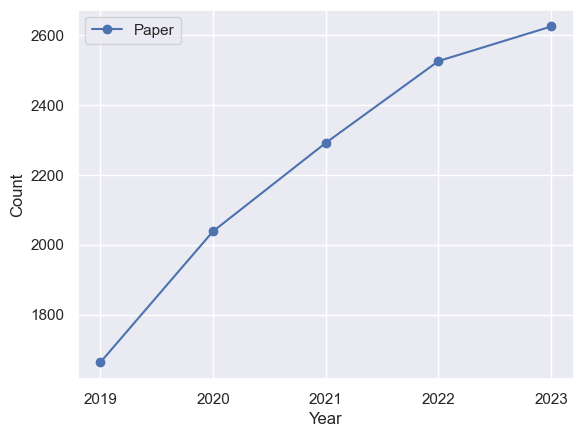

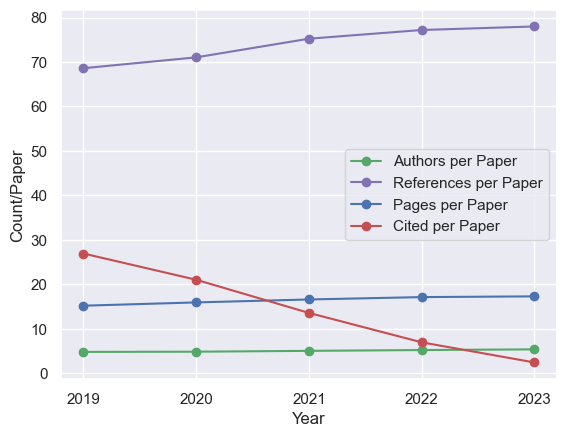

In [8]:
import matplotlib.pyplot as plt

# 横坐标为整数的年份
plt.xticks(trend_df['PY'].astype(int))  

# 在第一个图形上绘制年份与文献数量的趋势图
plt.plot(trend_df['PY'], trend_df['P'], label='Paper', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

# 在同一个图形上绘制年份与 NO.AU/P NR/P PG/P TC/P 的趋势图
plt.figure()
plt.xticks(trend_df['PY'].astype(int))
plt.plot(trend_df['PY'], trend_df['NO.AU/P'], label='Authors per Paper', marker='o', color='g')
plt.plot(trend_df['PY'], trend_df['NR/P'], label='References per Paper', marker='o', color='m')
plt.plot(trend_df['PY'], trend_df['PG/P'], label='Pages per Paper', marker='o', color='b')
plt.plot(trend_df['PY'], trend_df['TC/P'], label='Cited per Paper', marker='o', color='r')

plt.xlabel('Year')
plt.ylabel('Count/Paper')
plt.legend()
plt.show()

### 作者统计分析

新建一个 `DataFrame`，将 `RP` 中的作者信息分割，统计各作者出现的次数

`RP` 列需要把作者的姓名和机构合并起来进来统计

新版 WOS 导出的 `RP` 字段包含 `(corresponding author)` ，需要去掉，如：

> Alotaibi, BA (corresponding author), King Saud Univ, Coll Food & Agr Sci, Dept Agr Extens & Rural Soc, Riyadh 11451, Saudi Arabia.; Abbas, A (corresponding author), Univ Agr Faisalabad, Inst Agr & Resource Econ, Faisalabad 38040, Pakistan.

In [9]:

# 创建一个新的 DataFrame
rp_df = pd.DataFrame()
rp_df['RP'] = df['RP']
# 删除 NAN 的行
rp_df.dropna(subset=['RP'], inplace=True)

# 分割 RP 列中的字符串，以 ',' 为分隔符分割为一个列表
rp_df['RP'] = rp_df['RP'].str.split(',')

# 把单元格列表中第二项字符串里的 ' (corresponding author)' 去除
rp_df['RP'] = rp_df['RP'].apply(lambda x: [x[0],x[1].replace(' (corresponding author)', ''),x[2]])

# 合并列表前三项，用 ',' 连接
rp_df['RP'] = rp_df['RP'].apply(lambda x: ','.join(x[:3]))

# 对 RP 列计数
rp_df = rp_df['RP'].value_counts().reset_index(name='P')
# 将计数结果列重命名
rp_df.rename(columns={'RP':'RP,Ins.'}, inplace=True)

# 保存为 tab 分隔的 txt 文件
rp_df.to_csv('data/rp-data.txt', sep='\t', index=False)

rp_df.head(10)

,"RP,Ins.",P
0,"Ahmad,D,COMSATS Univ Islamabad",14
1,"Chen,XH,Sun Yat Sen Univ",12
2,"Wasko,C,Univ Melbourne",11
3,"Thaler,T,Univ Nat Resources & Life Sci",9
4,"Wang,HL,Zhengzhou Univ",9
5,"Tran,TA,Natl Univ Singapore",9
6,"Sharma,A,Univ New South Wales",8
7,"Xu,YP,Zhejiang Univ",8
8,"Shrestha,S,Asian Inst Technol",7
9,"Tan,ML,Univ Sains Malaysia",7


新建一个 `DataFrame`，将 `AF` 中的第一作者提取出来，统计数量

In [10]:
fau_df = pd.DataFrame()

fau_df['FAF'] = no_au_df['AF']

# 提取 FAF 列中的第一个作者
fau_df['FAF'] = fau_df['FAF'].apply(lambda x: x[0])

# 对 FAF 列计数
fau_df = fau_df['FAF'].value_counts().reset_index(name='P')

# 删除 [Anonymous] 行
fau_df = fau_df[fau_df['FAF'] != '[Anonymous]']

# 保存为 tab 分隔的 txt 文件
fau_df.to_csv('data/faf-data.txt', sep='\t', index=False)

fau_df.head(10)

,FAF,P
0,"Xu,Chong-Yu",25
1,"Thaler,Thomas",17
2,"Pezzoli,Alessandro",11
3,"Singh,Vijay P.",10
4,"Afzal,Muhammad",10
5,"Wang,Wei",10
6,"Hudson,Paul",10
7,"Shahid,Shamsuddin",9
8,"Fekete,Alexander",9
9,"Shah,Ashfaq Ahmad",9


新建一个 `DataFrame`，将 `AF` 中的所有作者展开出来，并统计数量

In [11]:
# 创建一个新的 DataFrame
au_df = pd.DataFrame()

au_df['AF'] = no_au_df['AF']

# 将 AF 列中的列表展开
au_df = au_df.explode('AF')

# 对 AF 列计数
au_df = au_df['AF'].value_counts().reset_index(name='P')

# 删除 [Anonymous] 行
au_df = au_df[au_df['AF'] != '[Anonymous]']

# 保存为 tab 分隔的 txt 文件
au_df.to_csv('data/af-data.txt', sep='\t', index=False)

au_df.head(10)



,AF,P
0,"Xia,Jun",33
1,"Xu,Chong-Yu",27
2,"Thaler,Thomas",27
3,"Botzen,W. J. Wouter",26
4,"Wasko,Conrad",25
5,"Aerts,Jeroen C. J. H.",24
6,"Wang,Hao",22
7,"Hinkel,Jochen",22
8,"Chen,Xiaohong",22
9,"Nicholls,Robert J.",20


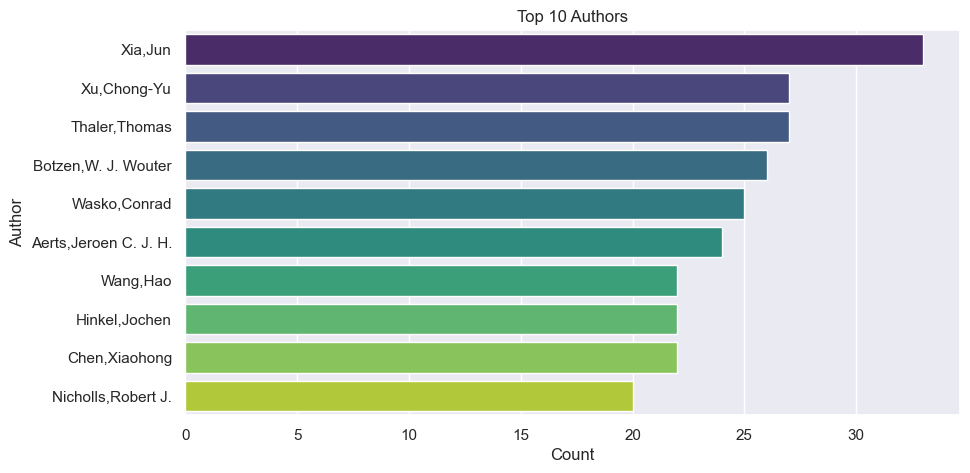

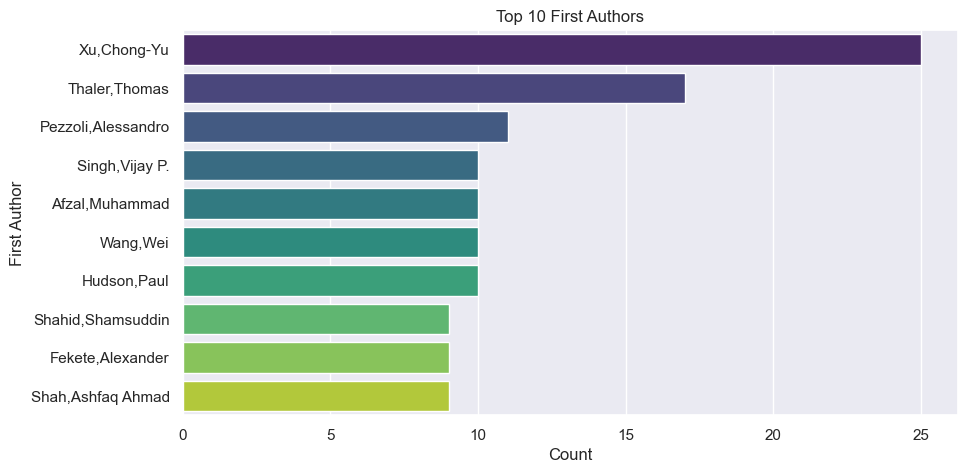

In [12]:
# 绘制前 10 位作者的柱状图
plt.figure(figsize=(10, 5))
sns.barplot(x='P', y='AF', data=au_df.head(10), palette='viridis')
plt.xlabel('Count')
plt.ylabel('Author')
plt.title('Top 10 Authors')
plt.show()

# 绘制前 10 位第一作者的柱状图
plt.figure(figsize=(10, 5))
sns.barplot(x='P', y='FAF', data=fau_df.head(10), palette='viridis')
plt.xlabel('Count')
plt.ylabel('First Author')
plt.title('Top 10 First Authors')
plt.show()

### 作者关键词分析

新建一个 `DataFrame`，利用数据透视表，同时按 `PY` 和 `DE` 进行统计关键词统计。


In [13]:
# 创建一个新的 DataFrame
de_df = pd.DataFrame()
de_df['PY'] = df['PY']
de_df['DE'] = df['DE'].str.split(';')

de_df = de_df.explode('DE')

# 利用数据透视表，对 DE 列进行计数
de_pivot = pd.pivot_table(de_df, index='DE', columns='PY', aggfunc=len, fill_value=0)
de_pivot['All'] = de_pivot.sum(axis=1)
de_pivot = de_pivot.sort_values(by='All', ascending=False, axis=0)

# # 保存为 tab 分隔的 txt 文件
de_df.to_csv('data/de-data.txt', sep='\t')

de_pivot.head(10)

PY,2019,2020,2021,2022,2023,All
DE,,,,,,
climate change,214,260,341,376,345,1536
Climate change,197,257,286,271,344,1355
flooding,44,53,48,61,58,264
Flood,30,29,47,46,57,209
Flooding,34,43,44,40,41,202
flood,27,24,51,46,52,200
Adaptation,39,40,42,32,39,192
Resilience,20,37,48,29,28,162
floods,24,29,21,41,37,152


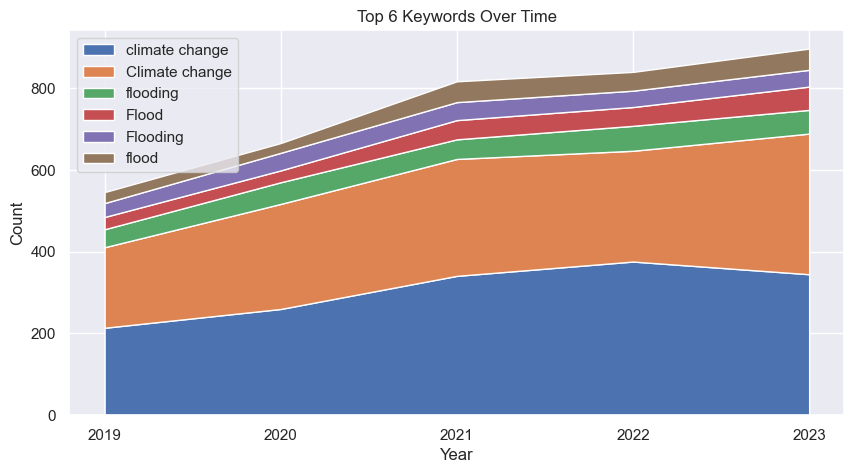

In [14]:
# 假设 de_pivot 是一个 DataFrame，其中的行是关键词，列是年份，值是关键词出现的次数
top_num  = 6

# 去掉 'All' 列
top_keywords = de_pivot.drop(columns='All').head(top_num)

plt.figure(figsize=(10, 5))

# 将年份转换为浮点数
years = top_keywords.columns.astype(int)
plt.xticks(trend_df['PY'].astype(int))  

# 使用 stackplot() 函数创建堆积图
plt.stackplot(years, top_keywords.values, labels=top_keywords.index)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top {} Keywords Over Time'.format(top_num))
plt.legend(loc='upper left')
plt.show()

### 国籍机构分析

新建一个 `DataFrame`，选取 `C1` ，先将作者与机构地址展开，如下所示，地址相同的作者被放在了同一个中括号里，需要先展开。同时，一个作者可能存在多个机构，需要避免重复计算

> [Chang, Carlos M.] Florida Int Univ, Dept Civil & Environm Engn, Miami, FL 33174 USA; [Chang, Carlos M.; Weidner, Jeffrey] Univ Texas El Paso, Ctr Transportat Infrastruct Syst, Dept Civil Engn, 500 West Univ Ave, El Paso, TX 79968 USA; [Ortega, Oscar] Univ Texas El Paso, Ctr Transportat Infrastruct Syst, Infrastruct Management Grp, 500 West Univ Ave, El Paso, TX 79968 USA

In [15]:
import re

# 创建一个新的 DataFrame
c1_df = pd.DataFrame()

c1_df['NO.'] = df['No.']

def abstract_author_address(s):
    if type(s) != str:
        return s

    matchs = re.findall(r'\[(.*?)\]\s(.*?)(?:;|$)', s)

    if len(matchs) == 0:
        return s

    result = []

    close_author = []
    for m in matchs:
        # 读取两个捕获组的内容
        authors = m[0].split(';')
        address = m[1]

        # 对地址中的国家进行处理，只要有一个正则匹配成功，就不再继续匹配
        # 美国
        if re.search(r',\w{2}\s\d{5}\sUSA$', address):
            address = re.sub(r',\w{2}\s\d{5}\sUSA$', ',USA', address)
        elif re.search(r',\w{2}\sUSA$', address):
            address = re.sub(r',\w{2}\sUSA$', ',USA', address)
        elif re.search(r',\w{2}\s\d{5}$', address):
            address = re.sub(r',\w{2}\s\d{5}$', ',USA', address)
        elif re.search(r',\w{2}$', address):
            address = re.sub(r',\w{2}$', ',USA', address)
        # 英国
        elif re.search(r',northern ireland$', address, re.I):
            address = re.sub(r',northern ireland$', ',UK', address, flags=re.I)
        elif re.search(r',scotland$', address, re.I):
            address = re.sub(r',scotland$', ',UK', address, flags=re.I)
        elif re.search(r',wales$', address, re.I):
            address = re.sub(r',wales$', ',UK', address, flags=re.I)
        elif re.search(r',england$', address, re.I):
            address = re.sub(r',england$', ',UK', address, flags=re.I)
        # 中国
        elif re.search(r',Peoples R China$', address):
            address = re.sub(r',Peoples R China$', ',China', address)
        elif re.search(r',Hong Kong(,Peoples R China)?$', address):
            address = re.sub(r',Hong Kong(,Peoples R China)?$', ',China', address)

        # # 将作者列表展开并与地址拼接
        # for author in authors:
        #     if author not in close_author:
        #         close_author.append(author)
        #         result.append(author + ';' + address)

        # 将每个作者的国家作为结果
        for author in authors:
            if author not in close_author:
                close_author.append(author)
                result.append(address.split(',')[-1])
            
        

    return result

c1_df['C1'] = df['C1'].apply(abstract_author_address)

# 将单元格的列表中重复的元素去掉
c1_df['C1'] = c1_df['C1'].apply(lambda x: list(set(x)) if isinstance(x, list) else x)
# 对 C1 列中的列表展开
count_c1_df = c1_df.explode('C1')
# 统计 C1 列
count_c1_df = count_c1_df['C1'].value_counts().reset_index(name='COUNT')
# 计算百分比
count_c1_df['PER'] = count_c1_df['COUNT'] / count_c1_df['COUNT'].sum() * 100
# 保存为 tab 分隔的 txt 文件
count_c1_df.to_csv('data/c1-data.txt', sep='\t', index=False)



single_c1_df = pd.DataFrame()
single_c1_df['SC1'] = c1_df['C1']
# 统计 SC1 列中列表长度为 1 的行
single_c1_df = single_c1_df[single_c1_df['SC1'].apply(lambda x: type(x) == list and len(x) == 1)]
single_c1_df = single_c1_df.explode('SC1')
single_c1_df = single_c1_df['SC1'].value_counts().reset_index(name='COUNT')
# 计算百分比
single_c1_df['PER'] = single_c1_df['COUNT'] / single_c1_df['COUNT'].sum() * 100


# 查找 USA 的合作国家
usa_cp_df = c1_df[c1_df['C1'].apply(lambda x: type(x) == list and 'USA' in x)].copy()
usa_cp_df = usa_cp_df.explode('C1')
# 删除 USA
usa_cp_df['C1'] = usa_cp_df['C1'].apply(lambda x: x if x != 'USA' else None)
usa_cp_df.dropna(subset=['C1'], inplace=True)
# 统计合作国家
usa_cp_df = usa_cp_df['C1'].value_counts().reset_index(name='COUNT')
# 计算百分比
usa_cp_df['PER'] = usa_cp_df['COUNT'] / usa_cp_df['COUNT'].sum() * 100

# 保存为 tab 分隔的 txt 文件
usa_cp_df.to_csv('data/usa-cp-data.txt', sep='\t', index=False)

usa_cp_df.head(10)

,C1,COUNT,PER
0,China,327,14.192708
1,UK,208,9.027778
2,Canada,122,5.295139
3,Germany,118,5.121528
4,Australia,118,5.121528
5,Netherlands,110,4.774306
6,France,88,3.819444
7,Brazil,73,3.168403
8,India,70,3.038194
9,Italy,69,2.994792


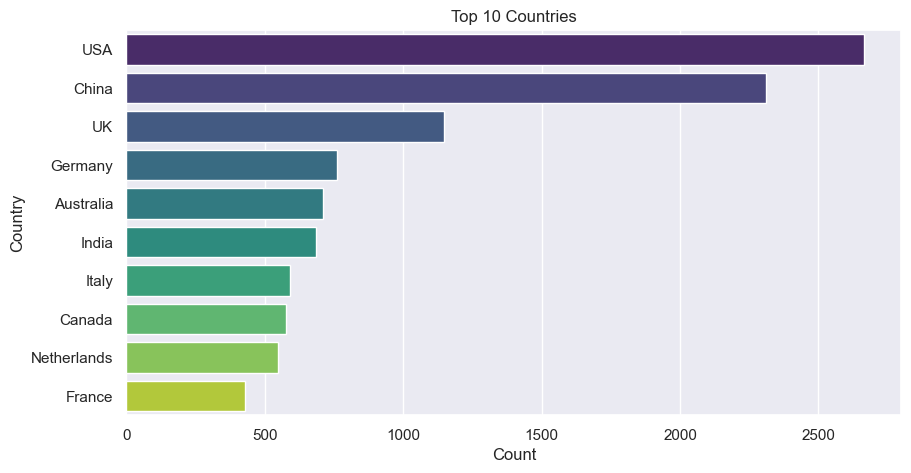

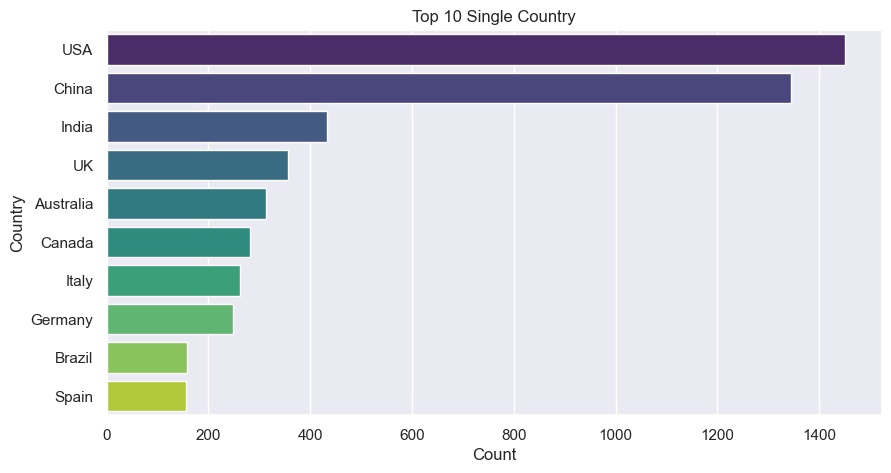

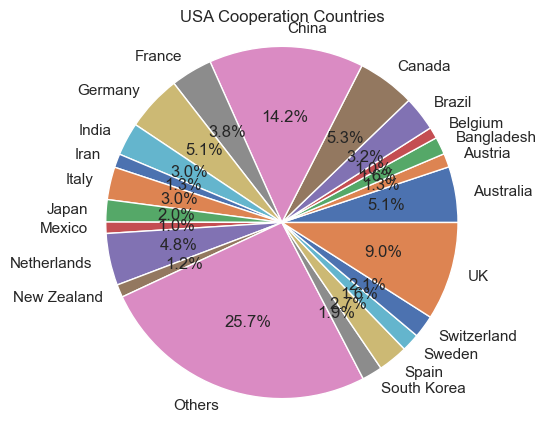

In [16]:
top_num = 10

# 绘制国家论文数量的柱状图
plt.figure(figsize=(10, 5))
sns.barplot(x='COUNT', y='C1', data=count_c1_df.head(top_num), palette='viridis')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top {} Countries'.format(top_num))
plt.show()

# 绘制单一国家论文数量的柱状图
plt.figure(figsize=(10, 5))
sns.barplot(x='COUNT', y='SC1', data=single_c1_df.head(top_num), palette='viridis')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top {} Single Country'.format(top_num))
plt.show()

# 绘制 USA 合作国家的饼图
# 合并占比小于 2% 的文献类型

temp = usa_cp_df.copy()
temp.loc[temp['PER'].astype(float) < 1, 'C1'] = 'Others'
temp = temp.groupby('C1').agg({'COUNT': 'sum', 'PER': 'sum'}).reset_index()


plt.figure(figsize=(5, 5))
plt.pie(temp['COUNT'], labels=temp['C1'], autopct='%1.1f%%')  
plt.axis('equal')
plt.title('USA Cooperation Countries')
plt.show()


### 作者间合作网络分析

新建一个 `DataFrame`，选取 `AF` 

In [17]:
# 创建一个新的 DataFrame
cp_df = pd.DataFrame()

cp_df['NO.'] = no_au_df['NO.']
cp_df['AF'] = no_au_df['AF']
cp_df = cp_df.explode('AF')

# 选取前 n 个作者
top_num = 50
top_af_df = au_df.head(top_num)[['AF']]
top_af_list = top_af_df['AF'].tolist()


# 统计任意两个 top 作者出现在同一篇文章中的次数
cp_pivot = pd.pivot_table(top_af_df, index='AF', columns='AF', aggfunc=len, fill_value=0)


# 重排 cp_pivot 的行和列的顺序，按照 top_af_list 的顺序
cp_pivot = cp_pivot.reindex(index=top_af_list, columns=top_af_list)



idx_dict = {}
for af in top_af_list:
    # 统计 cp_df 中 af 所在的行的索引的列表
    idx_list = cp_df[cp_df['AF'] == af].index.tolist()
    idx_dict[af]=idx_list


# 统计任意两个 top 作者的 idx_lists 中的索引列表的交集的个数
for af1 in top_af_list:
    for af2 in top_af_list:
        idx1 = idx_dict[af1]
        idx2 = idx_dict[af2]
        cp_pivot.loc[af1, af2] = len(set(idx1) & set(idx2))


# 保存为 tab 分隔的 txt 文件
cp_pivot.to_csv('data/cp-data.txt', sep='\t')

cp_pivot.head(50)


AF,"Xia,Jun","Xu,Chong-Yu","Thaler,Thomas","Botzen,W. J. Wouter","Wasko,Conrad","Aerts,Jeroen C. J. H.","Wang,Hao","Hinkel,Jochen","Chen,Xiaohong","Nicholls,Robert J.",...,"Tan,Mou Leong","Pokhrel,Yadu","Talukdar,Swapan","Bouma,Tjeerd J.","Singh,Vijay P.","Russo,Beniamino","Fuchs,Sven","Li,Jianfeng","Li,Xin","Murphy,Conor"
AF,,,,,,,,,,,,,,,,,,,,,
"Xia,Jun",33,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Xu,Chong-Yu",3,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Thaler,Thomas",0,0,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,1
"Botzen,W. J. Wouter",0,0,0,26,0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Wasko,Conrad",0,0,0,0,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Aerts,Jeroen C. J. H.",0,0,0,15,0,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Wang,Hao",0,0,0,0,0,0,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Hinkel,Jochen",0,0,0,0,0,0,0,22,0,5,...,0,0,0,0,0,0,0,0,0,0
"Chen,Xiaohong",0,0,0,0,0,0,0,0,22,0,...,0,0,0,0,0,0,0,0,0,0


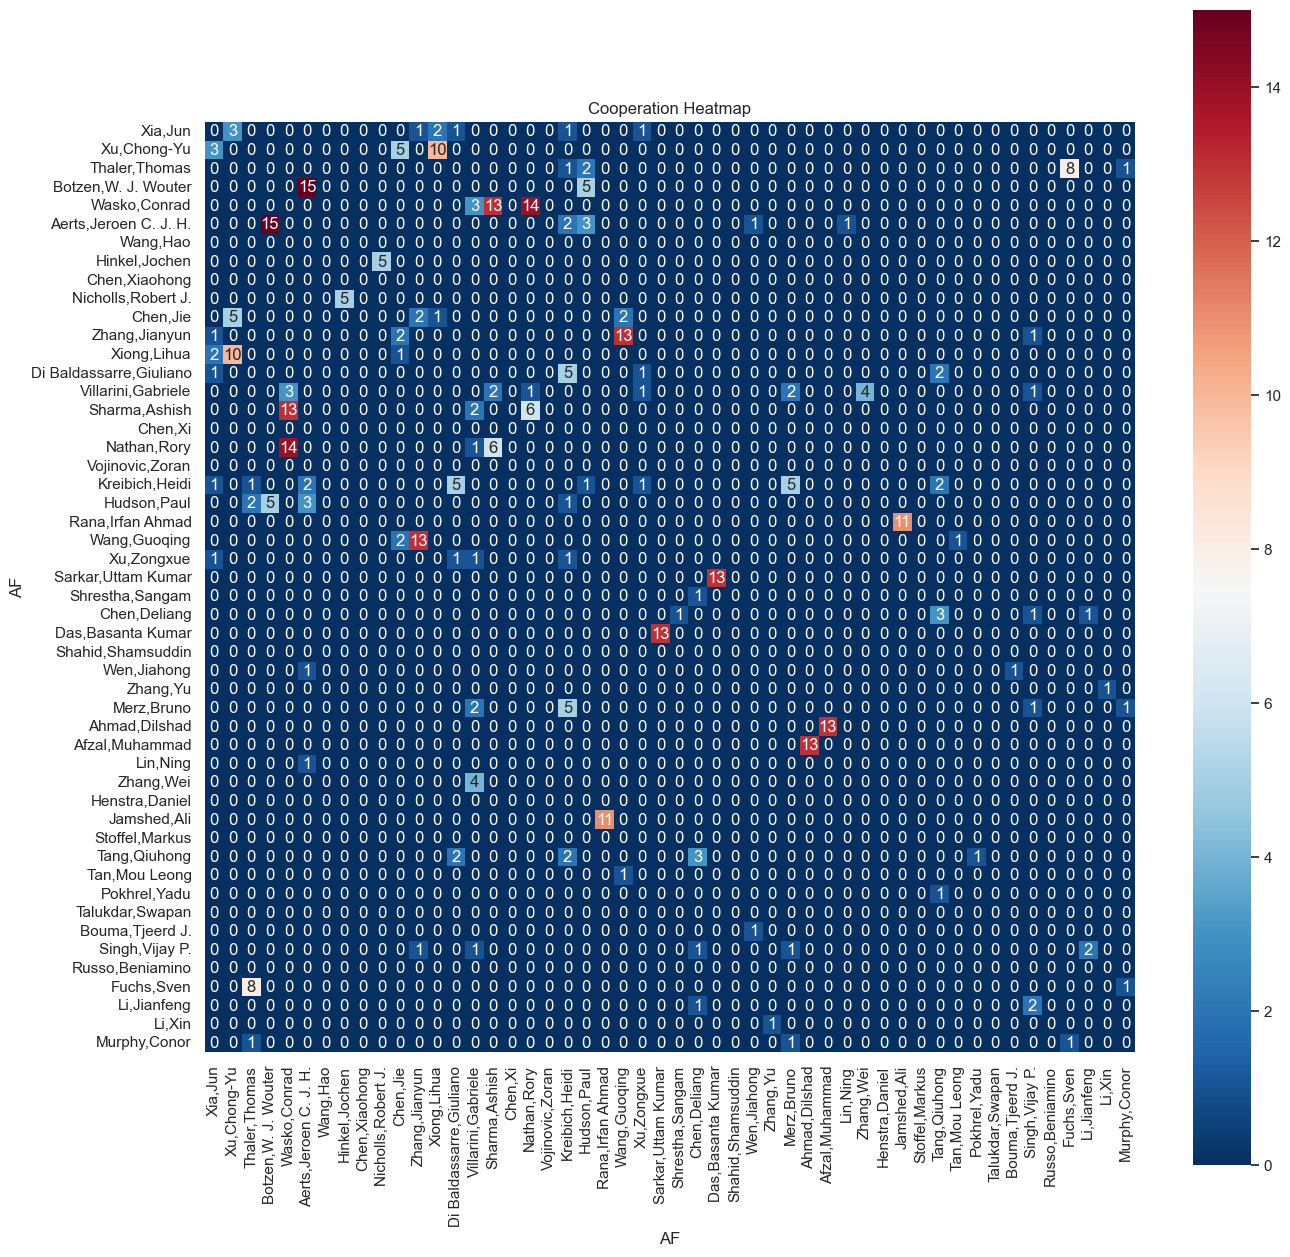

In [18]:
import numpy as np

# 将对角线的值设置为 0
temp = cp_pivot.copy()
np.fill_diagonal(temp.values, 0)


# 绘制热力图
plt.figure(figsize=(15, 15))
sns.heatmap(temp, cmap='RdBu_r', annot=True, fmt='d', square=True)
plt.title('Cooperation Heatmap')
plt.show()

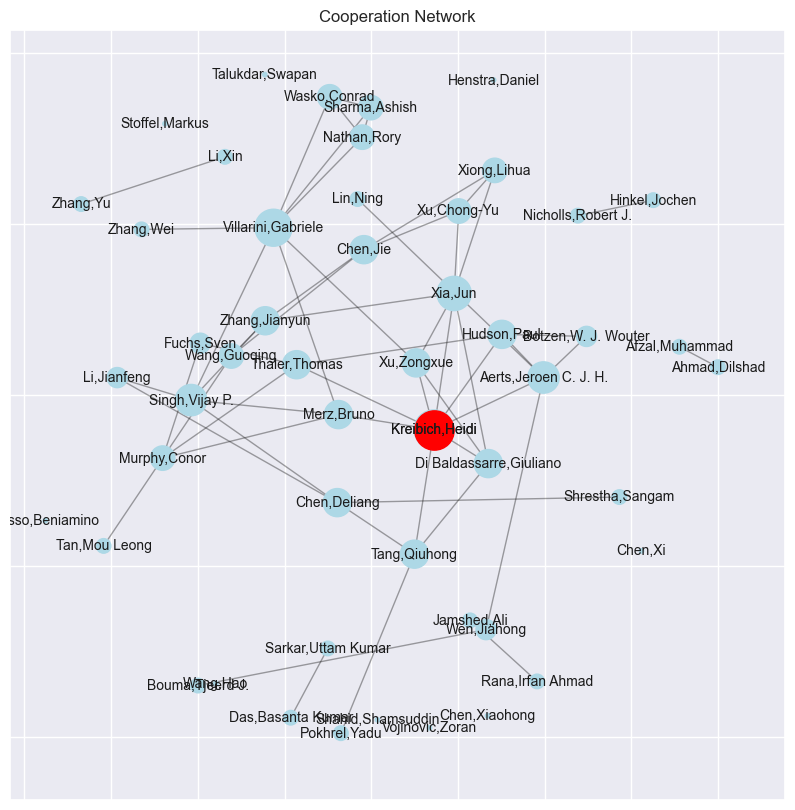

In [21]:
import networkx as nx

# 将对角线的值设置为 0
temp = cp_pivot.copy()
np.fill_diagonal(temp.values, 0)

top_num = 50
temp = temp.head(top_num)


# 绘制作者的关系网络图
G = nx.from_pandas_adjacency(temp)

# 设置节点的大小，保证有节点有一定大小，不至于看不到节点
node_size = [G.degree(n) * 100+ 10 for n in G]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.8)
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=10)


# 找到最重要的一个节点
max_degree = max(dict(G.degree()).values())
max_node = [k for k, v in dict(G.degree()).items() if v == max_degree][0]
nx.draw_networkx_nodes(G, pos, nodelist=[max_node], node_size=[max_degree * 100], node_color='red')
nx.draw_networkx_labels(G, pos, labels={max_node: max_node}, font_size=10)


plt.title('Cooperation Network')
plt.show()

